In [1]:
import pandas as pd
import sqlite3

print(pd.__version__)

2.3.3


In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("matkassen.db")

df = pd.read_sql(
    "SELECT * FROM matkassen_tvattad",
    conn
)

conn.close()

df.head()

DatabaseError: Execution failed on sql 'SELECT * FROM matkassen_tvattad': no such table: matkassen_tvattad

In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("matkassen.db")

pd.read_sql(
    "SELECT name FROM sqlite_master WHERE type='table';",
    conn
)

,name
0,matkassen


In [4]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("matkassen.db")

df = pd.read_sql(
    "SELECT * FROM matkassen",
    conn
)

conn.close()

df.head()

,leverans_id,prenumeration_id,kund_id,pren_startdatum,paus_från,paus_till,pren_avslutsdatum,kasstyp,kostpreferens,antal_portioner,...,leveransdatum,postnummer,veckapris,leveransstatus,recept_1,recept_2,recept_3,omdöme_text,omdömesdatum,omdömesbetyg
0,LEV-2024-000001,PREN-1002,KUND-05001,2024-04-10,None,None,None,Klassisk,Standard,4,...,2024-07-03,10393,699.0,Levererad,Panerad fisk med remouladsås,Kyckling Tikka Masala,Köttfärssås med pasta,None,None,NaN
1,LEV-2024-000002,PREN-1003,KUND-05002,2024-06-12,None,None,None,Familj,Standard,6,...,2024-07-02,40545,919.0,Levererad,Chicken nuggets-sallad,Köttbullar med makaroner,Fiskpinnar med potatismos,Älskar att slippa planera middagar. Tack!,2024-07-07,4.0
2,LEV-2024-000003,PREN-1011,KUND-05010,2024-05-11,None,None,2024-07-16,Vegetarisk,None,4,...,2024-07-02,10686,709.0,Levererad,Falafel med hummus,Svamprisotto,Vegetarisk lasagne,Svamprisotto var verkligen inte gott. Slängde ...,2024-07-06,2.0
3,LEV-2024-000004,PREN-1017,KUND-05016,2024-05-26,None,None,None,Snabb & Enkel,Laktosfri,4,...,2024-07-01,40695,689.0,Levererad,15-minuters wok,Toast med avokado och ägg,Snabb tomatsoppa,Priset är högt men sparar tid. På gränsen.,2024-07-06,3.0
4,LEV-2024-000005,PREN-1018,KUND-05017,2024-05-02,None,None,2024-08-19,Klassisk,None,2,...,2024-07-01,21938,499.0,Levererad,Panerad fisk med remouladsås,Laxfile med potatismos,Pasta Carbonara,"Fungerar, men recepten börjar bli repetitiva.",2024-07-08,3.0


In [5]:
df_features = df.copy()

In [6]:
df_features.head()

,leverans_id,prenumeration_id,kund_id,pren_startdatum,paus_från,paus_till,pren_avslutsdatum,kasstyp,kostpreferens,antal_portioner,...,leveransdatum,postnummer,veckapris,leveransstatus,recept_1,recept_2,recept_3,omdöme_text,omdömesdatum,omdömesbetyg
0,LEV-2024-000001,PREN-1002,KUND-05001,2024-04-10,None,None,None,Klassisk,Standard,4,...,2024-07-03,10393,699.0,Levererad,Panerad fisk med remouladsås,Kyckling Tikka Masala,Köttfärssås med pasta,None,None,NaN
1,LEV-2024-000002,PREN-1003,KUND-05002,2024-06-12,None,None,None,Familj,Standard,6,...,2024-07-02,40545,919.0,Levererad,Chicken nuggets-sallad,Köttbullar med makaroner,Fiskpinnar med potatismos,Älskar att slippa planera middagar. Tack!,2024-07-07,4.0
2,LEV-2024-000003,PREN-1011,KUND-05010,2024-05-11,None,None,2024-07-16,Vegetarisk,None,4,...,2024-07-02,10686,709.0,Levererad,Falafel med hummus,Svamprisotto,Vegetarisk lasagne,Svamprisotto var verkligen inte gott. Slängde ...,2024-07-06,2.0
3,LEV-2024-000004,PREN-1017,KUND-05016,2024-05-26,None,None,None,Snabb & Enkel,Laktosfri,4,...,2024-07-01,40695,689.0,Levererad,15-minuters wok,Toast med avokado och ägg,Snabb tomatsoppa,Priset är högt men sparar tid. På gränsen.,2024-07-06,3.0
4,LEV-2024-000005,PREN-1018,KUND-05017,2024-05-02,None,None,2024-08-19,Klassisk,None,2,...,2024-07-01,21938,499.0,Levererad,Panerad fisk med remouladsås,Laxfile med potatismos,Pasta Carbonara,"Fungerar, men recepten börjar bli repetitiva.",2024-07-08,3.0


In [7]:
df_features["leveransstatus"].value_counts()

leveransstatus
Levererad       2332
Missad           265
OK                76
LEVERERAD         73
levererad         55
MISSAD             7
Missed             6
Ej levererad       5
Name: count, dtype: int64

In [8]:
df_features["leveransstatus"].value_counts(normalize=True)

leveransstatus
Levererad       0.827244
Missad          0.094005
OK              0.026960
LEVERERAD       0.025896
levererad       0.019510
MISSAD          0.002483
Missed          0.002128
Ej levererad    0.001774
Name: proportion, dtype: float64

In [9]:
df_features["leveransstatus"] = df_features["leveransstatus"].replace({
    "LEVERERAD": "Levererad",
    "levererad": "Levererad",
    "OK": "Levererad",
    "Delivered": "Levererad",
    "MISSAD": "Missad",
    "Missed": "Missad",
    "Ej levererad": "Missad"
})

In [10]:
df_features["leveransstatus"].value_counts()

leveransstatus
Levererad    2536
Missad        283
Name: count, dtype: int64

In [11]:
df_features["leveransstatus"].value_counts(normalize=True)

leveransstatus
Levererad    0.89961
Missad       0.10039
Name: proportion, dtype: float64

In [12]:
df_features = df.copy()

In [13]:
df_ratings = df_features.dropna(subset=["omdömesbetyg"])

In [14]:
kpi_betyg = (
    df_ratings
    .groupby("kasstyp")["omdömesbetyg"]
    .mean()
    .sort_values(ascending=False)
)

kpi_betyg

kasstyp
Familjekassen    3.833333
Veggie           3.666667
Standard         3.555556
Snabb & enkel    3.500000
Vegetarian       3.500000
Vegetarisk       3.432692
Klassisk         3.395010
Familj           3.356522
30-min           3.142857
Snabb & Enkel    3.038168
Quick            3.000000
Express          2.500000
snabb            1.750000
Name: omdömesbetyg, dtype: float64

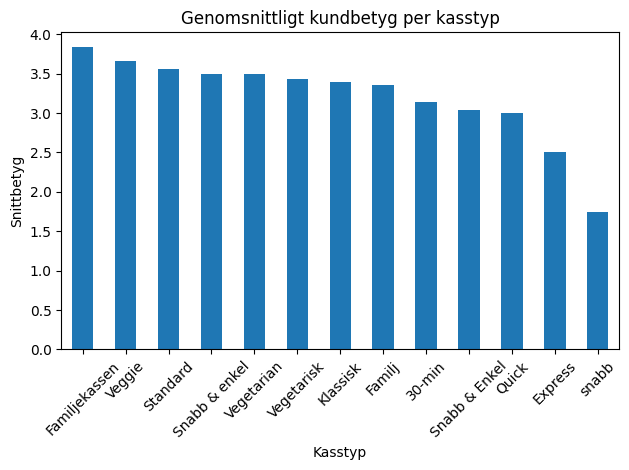

In [27]:
import matplotlib.pyplot as plt

ax = kpi_betyg.plot(
    kind="bar",
    title="Genomsnittligt kundbetyg per kasstyp",
    ylabel="Snittbetyg",
    xlabel="Kasstyp",
    rot=45
)

plt.tight_layout()
plt.savefig("kpi_betyg_per_kasstyp.png")
plt.show()

In [16]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.4/253.4 KB 6.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 5.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 KB 6.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
# KPI 3 – Prenumerations-churn

df["avslutad_prenumeration"] = df["pren_avslutsdatum"].notna()

kpi_churn = df["avslutad_prenumeration"].value_counts(normalize=True)

kpi_churn

avslutad_prenumeration
False    0.842852
True     0.157148
Name: proportion, dtype: float64

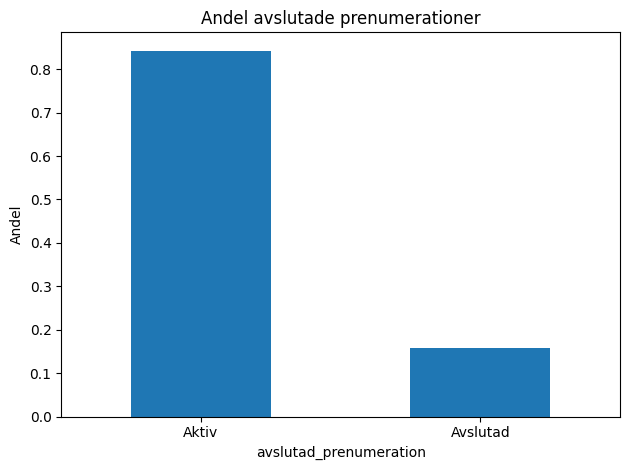

In [28]:
ax = kpi_churn.rename(
    {True: "Avslutad", False: "Aktiv"}
).plot(
    kind="bar",
    title="Andel avslutade prenumerationer",
    ylabel="Andel",
    rot=0
)
plt.tight_layout()
plt.savefig("kpi_churn_andel.png")
plt.show()

# Data Dictionary – Matkassen

| Kolumn | Beskrivning |
|------|------------|
| leverans_id | Unikt ID för varje leverans |
| prenumeration_id | ID för kundens prenumeration |
| kund_id | Unikt kund-ID |
| pren_startdatum | Startdatum för prenumeration |
| paus_från | Datum då prenumerationen pausades |
| paus_till | Datum då pausen avslutades |
| pren_avslutsdatum | Datum då prenumerationen avslutades |
| kasstyp | Typ av matkasse (t.ex. Klassisk, Familj, Vegetarisk) |
| kostpreferens | Kostpreferens (t.ex. laktosfri, vegetarisk) |
| antal_portioner | Antal portioner per leverans |
| leveransdatum | Datum för leveransen |
| postnummer | Kundens postnummer |
| veckapris | Pris för matkassen per vecka (SEK) |
| leveransstatus | Status för leveransen (Levererad/Missad) |
| recept_1 | Första receptet i matkassen |
| recept_2 | Andra receptet i matkassen |
| recept_3 | Tredje receptet i matkassen |
| omdöme_text | Kundens fritextomdöme |
| omdömesdatum | Datum då omdömet skrevs |
| omdömesbetyg | Numeriskt kundbetyg (1–5) | 

In [21]:
def sentiment_from_rating(betyg):
    if pd.isna(betyg):
        return "Ingen data"
    elif betyg >= 4:
        return "Positiv"
    elif betyg == 3:
        return "Neutral"
    else:
        return "Negativ"

In [22]:
df_features["sentiment"] = df_features["omdömesbetyg"].apply(sentiment_from_rating)

In [23]:
df_features["sentiment"].value_counts()

sentiment
Ingen data    1702
Positiv        600
Neutral        262
Negativ        255
Name: count, dtype: int64

In [24]:
sentiment_kpi = df_features["sentiment"].value_counts(normalize=True)
sentiment_kpi

sentiment
Ingen data    0.603760
Positiv       0.212841
Neutral       0.092941
Negativ       0.090458
Name: proportion, dtype: float64

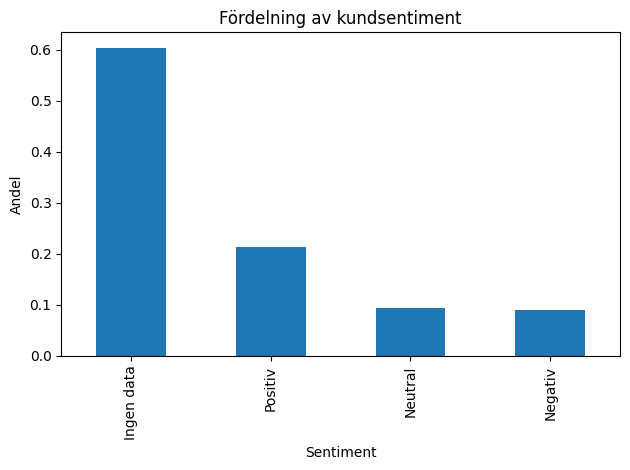

In [29]:
ax = sentiment_kpi.plot(
    kind="bar",
    title="Fördelning av kundsentiment",
    ylabel="Andel",
    xlabel="Sentiment"
)
plt.tight_layout()
plt.savefig("kpi_sentiment_fordelning.png")
plt.show()

In [26]:
sentiment_kasstyp = (
    df_features
    .groupby("kasstyp")["sentiment"]
    .value_counts(normalize=True)
    .unstack()
)

sentiment_kasstyp

sentiment,Ingen data,Negativ,Neutral,Positiv
kasstyp,,,,
30-min,0.611111,0.166667,0.111111,0.111111
Express,0.666667,0.166667,0.083333,0.083333
Familj,0.611486,0.092905,0.077703,0.217905
Familjekassen,0.454545,NaN,0.227273,0.318182
Klassisk,0.590638,0.085957,0.095319,0.228085
Quick,0.500000,0.100000,0.300000,0.100000
Snabb & Enkel,0.606607,0.111111,0.141141,0.141141
Snabb & enkel,0.833333,NaN,0.083333,0.083333
Standard,0.684211,0.035088,0.105263,0.175439
